In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

## Task 1: Data Exploration

 1. Load the dataset into your preferred data analysis tool (e.g., Python, R, Excel).

In [2]:
df=pd.read_csv("C:/Users/nitis/Downloads/1Dec to 3Jan Consultations.csv")

In [8]:
df

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,callChannel,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,source
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,True,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,True,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300,False,True,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300,False,True,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580,False,False,...,N/A,N/A,14.55,completed,0,7.275,14.55,completed,0,Test
28023,N/A,Tarot Rupanshi,74,43361,Call,app,no-refund,0,False,False,...,Normal,failed,0.00,failed,0,0.000,0.00,N/A,0,Test
28024,N/A,Astro Sanjeev,95,43361,Call,app,no-refund,0,False,False,...,Normal,failed,0.00,completed,9,0.000,0.00,canceled,0,Test
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,no-answer,0,0.000,0.00,N/A,0,Production


2. Check for missing values in the dataset and handle them appropriately

In [34]:
df.isnull().sum()

chatStatus                   8512
guruName                        0
gid                             0
uid                             0
consultationType                0
website                         0
refundStatus                    0
isWhiteListUser                 0
chatSeconds                     0
queue                           0
freeCall                        0
freeChat                        0
createdAt                       0
updatedAt                       0
timeDuration                    0
callChannel                 19519
callStatus                  19486
amount                          0
astrologerCallStatus        11769
astrologerOnCallDuration        0
astrologersEarnings             0
netAmount                       0
userCallStatus              18682
userOnCallDuration              0
source                      11736
dtype: int64

In [50]:
df['astrologerCallStatus']=df['astrologerCallStatus'].fillna('N/A')
df['userCallStatus']=df['userCallStatus'].fillna('N/A')
df['source']=df['source'].fillna('N/A')
df['chatStatus']=df['chatStatus'].fillna('N/A')
df['callStatus']=df['callStatus'].fillna('N/A')
df['callChannel']=df['callChannel'].fillna('N/A')


In [14]:
df.isnull().sum()

chatStatus                  0
guruName                    0
gid                         0
uid                         0
consultationType            0
website                     0
refundStatus                0
chatSeconds                 0
freeCall                    0
freeChat                    0
createdAt                   0
updatedAt                   0
timeDuration                0
callChannel                 0
callStatus                  0
amount                      0
astrologerCallStatus        0
astrologerOnCallDuration    0
astrologersEarnings         0
netAmount                   0
userCallStatus              0
userOnCallDuration          0
source                      0
dtype: int64

In [51]:
df.drop(columns=['queue','isWhiteListUser'],axis=1,inplace=True)

In [15]:
df.isnull().any().sum()

0

In [40]:
df.shape

(28027, 23)

3. Provide summary statistics for key numeric columns (e.g., Charge, TalkTime).


In [21]:
df.describe()


,gid,uid,chatSeconds,timeDuration,amount,astrologerOnCallDuration,astrologersEarnings,netAmount,userOnCallDuration
count,28027.000000,28027.000000,28027.00000,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000
mean,220.890498,34846.342812,243.10415,1.509520,7.637846,38.439505,3.537538,7.635042,35.452778
std,86.575346,7812.317551,311.28032,3.037319,50.648404,146.344703,24.446619,50.647389,144.223415
min,8.000000,1.000000,0.00000,-0.166700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,31659.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,255.000000,36213.000000,300.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,281.000000,40109.000000,300.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,325.000000,44005.000000,7980.00000,67.000000,1800.000000,4029.000000,900.000000,1800.000000,4020.000000


4. Visualize the distribution of call charges using a histogram.


count    28027.000000
mean         7.637846
std         50.648404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1800.000000
Name: amount, dtype: float64


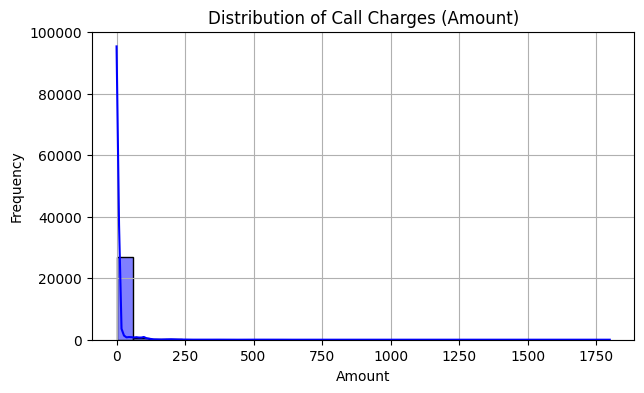

In [17]:


# Check for the range of the 'amount' column
print(df['amount'].describe())

# Plot the histogram for the 'amount' column
plt.figure(figsize=(7, 4))
sns.histplot(df['amount'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Call Charges (Amount)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Task 2: Call Center Performance Metrics


5. Calculate the average TalkTime for different call activities (Activity column).

In [23]:

# Calculate the average TalkTime for different consultation types
average_talktime = df.groupby('consultationType')['userOnCallDuration'].mean().reset_index()

# Rename columns for clarity
average_talktime.columns = ['ConsultationType', 'AverageTalkTime']

# Display the results
print("Average TalkTime for different consultation types:")
print(average_talktime)

Average TalkTime for different consultation types:
   ConsultationType  AverageTalkTime
0              Call       116.717795
1              Chat         0.000000
2     Complementary       300.000000
3  public_live_Call         0.000000


6. Determine the most common source of calls (Source column)

In [16]:
df[df['source']!='N/A']['source'].value_counts()

source
Production    16256
Test             35
Name: count, dtype: int64

7. Calculate the total earnings and spending for both users and masters

In [25]:
# Calculate the total spending for users
total_user_spending = df['amount'].sum()

# Calculate the total earnings for masters
total_master_earnings = df['astrologersEarnings'].sum()

# Display the results
print(f"Total User Spending: {total_user_spending}")
print(f"Total Master Earnings: {total_master_earnings}")

Total User Spending: 214065.89866665698
Total Master Earnings: 99146.570949939


8. Analyze the relationship between TalkTime and Charge

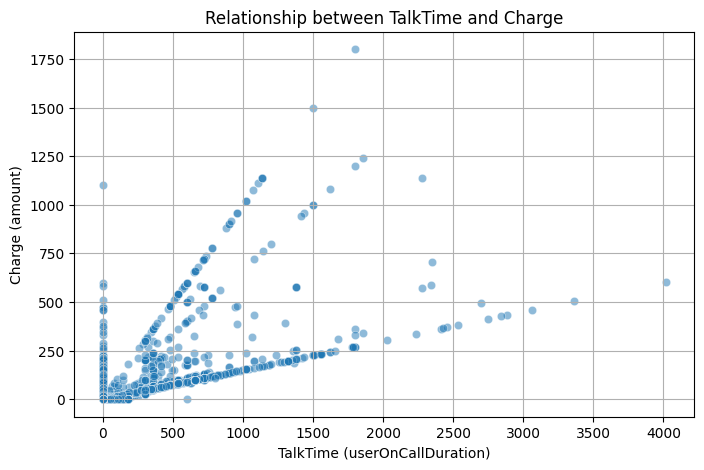

In [20]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='userOnCallDuration', y='amount', data=df, alpha=0.5)
plt.title('Relationship between TalkTime and Charge')
plt.xlabel('TalkTime (userOnCallDuration)')
plt.ylabel('Charge (amount)')
plt.grid(True)
plt.show()



## TASK 3

9. Calculate the average time it takes for calls to be connected (ConnectTime - DialTime) (note:- we do not have (ConnectTime - DialTime) column)


In [40]:
# Correct datetime format for 'createdAt' and 'updatedAt'
df['createdAt'] = pd.to_datetime(df['createdAt'], format='%d-%m-%Y %H:%M')
df['updatedAt'] = pd.to_datetime(df['updatedAt'], format='%d-%m-%Y %H:%M')

# Calculate the time difference for status transitions
df['StatusTransitionTime'] = df['updatedAt'] - df['createdAt']

# Calculate the average time for calls to transition between statuses
average_transition_time = df['StatusTransitionTime'].mean()

print(f"Average time for calls to transition between statuses: {average_transition_time}")

Average time for calls to transition between statuses: 0 days 00:56:44.616262889


10. Identify the most common reason for call disconnection (UnconnectTime - ConnectTime).


In [43]:
# Calculate call status distribution excluding 'N/A'
call_status_distribution = df[df['callStatus'] != 'N/A']['callStatus'].value_counts(normalize=True) * 100

print("Call Status Distribution (excluding 'N/A'):")
print(call_status_distribution)

Call Status Distribution (excluding 'N/A'):
callStatus
completed     40.428521
no-answer     20.243531
busy          14.869453
failed        14.213792
incomplete    10.244702
Name: proportion, dtype: float64


11. Analyze the HangUpTime patterns and identify any trends

In [18]:
# Check the unique values in 'callStatus' to understand the distribution
print("Unique Call Statuses:")
print(df[df['callStatus']!='N/A']['callStatus'].value_counts())

Unique Call Statuses:
callStatus
completed     3453
no-answer     1729
busy          1270
failed        1214
incomplete     875
Name: count, dtype: int64


In [29]:
df.groupby('callStatus')['amount'].mean()

callStatus
N/A            2.334737
busy           0.000000
completed     48.796013
failed         0.000000
incomplete     0.000000
no-answer      0.000000
Name: netAmount, dtype: float64

In [31]:
df.groupby('callStatus')['astrologersEarnings'].mean()

callStatus
N/A            1.095076
busy           0.000000
completed     22.533429
failed         0.000000
incomplete     0.000000
no-answer      0.000000
Name: astrologersEarnings, dtype: float64

In [32]:
df.groupby('callStatus')['netAmount'].mean()

callStatus
N/A            2.334737
busy           0.000000
completed     48.796013
failed         0.000000
incomplete     0.000000
no-answer      0.000000
Name: netAmount, dtype: float64

## Task 4: Order and Refund Analysis

12. Determine the order status distribution for calls.


Order Status Distribution (excluding 'N/A' values):
callStatus
completed     3453
no-answer     1729
busy          1270
failed        1214
incomplete     875
Name: count, dtype: int64


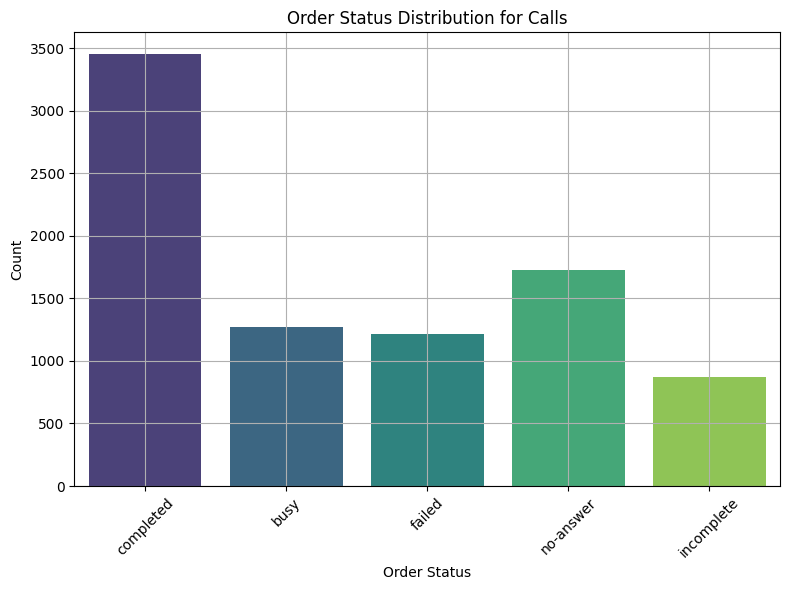

In [36]:
# Filter out rows where callStatus is 'N/A'
df_filtered = df[df['callStatus'] != 'N/A']

# Check the unique values and their counts in 'callStatus' column
order_status_distribution = df_filtered['callStatus'].value_counts()

# Print the distribution
print("Order Status Distribution (excluding 'N/A' values):")
print(order_status_distribution)

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='callStatus', data=df_filtered, palette='viridis')
plt.title('Order Status Distribution for Calls')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

13. Calculate the total refund amount and identify the refund status distribution.


In [23]:
df_filtered=df[df['refundStatus']!='N/A']
# Check the unique values and their counts in 'refundStatus' column
refund_status_distribution = df_filtered['refundStatus'].value_counts()

# Print the distribution
print("Refund Status Distribution:")
print(refund_status_distribution)

Refund Status Distribution:
refundStatus
no-refund     28022
Approved          3
Rejected          1
Processing        1
Name: count, dtype: int64


Refund Status Distribution:
refundStatus
no-refund     8536
Approved         3
Rejected         1
Processing       1
Name: count, dtype: int64


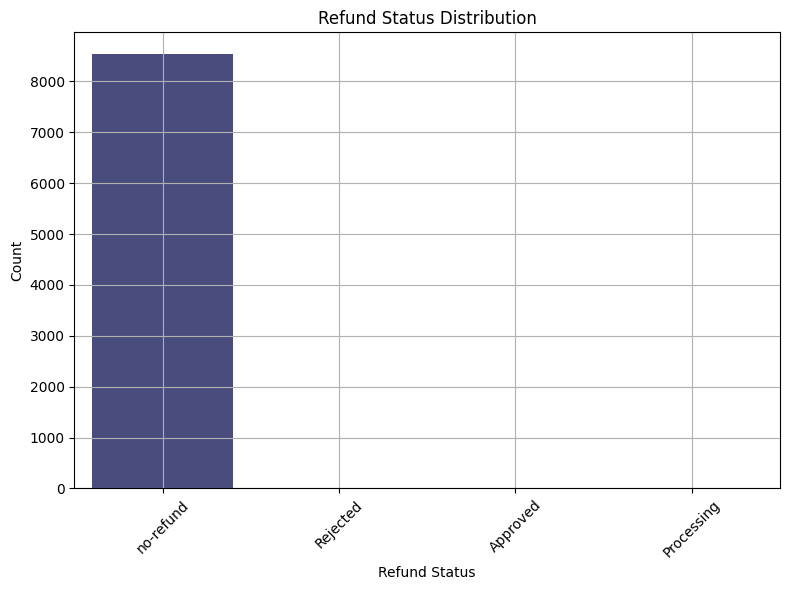

In [37]:
# Check the unique values and their counts in 'refundStatus' column
refund_status_distribution = df_filtered['refundStatus'].value_counts()

# Print the distribution
print("Refund Status Distribution:")
print(refund_status_distribution)

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='refundStatus', data=df_filtered, palette='viridis')
plt.title('Refund Status Distribution')
plt.xlabel('Refund Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## TASK 6

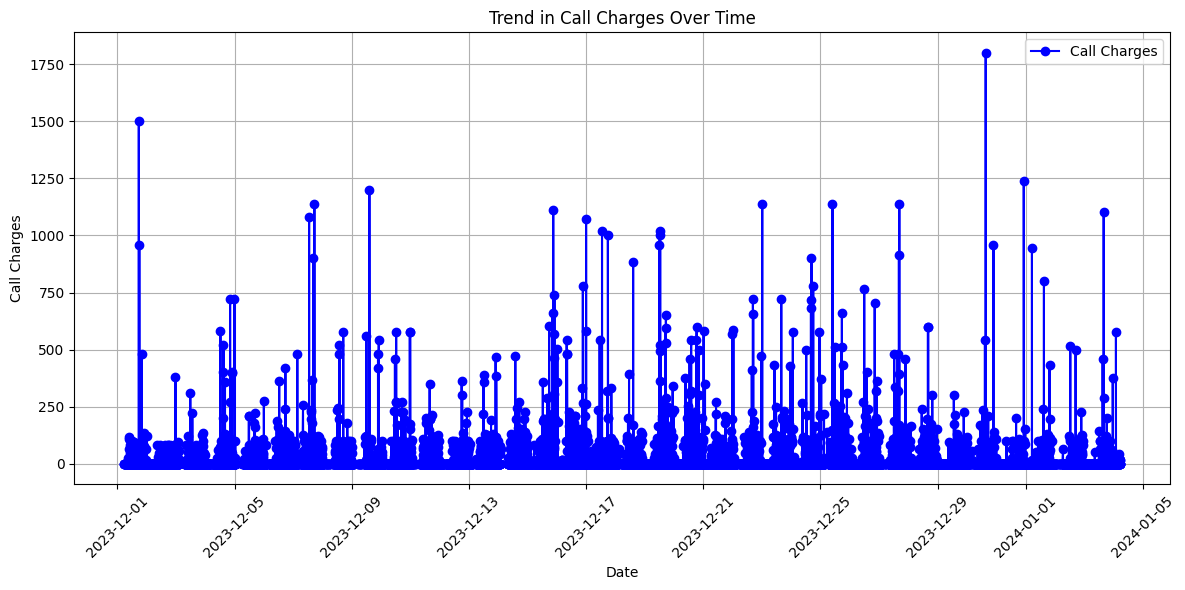

In [44]:

# Sort by 'createdAt' for plotting
df = df.sort_values(by='createdAt')

# Plotting the trend in call charges over time
plt.figure(figsize=(12, 6))
plt.plot(df['createdAt'], df['amount'], marker='o', linestyle='-', color='b', label='Call Charges')
plt.title('Trend in Call Charges Over Time')
plt.xlabel('Date')
plt.ylabel('Call Charges')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


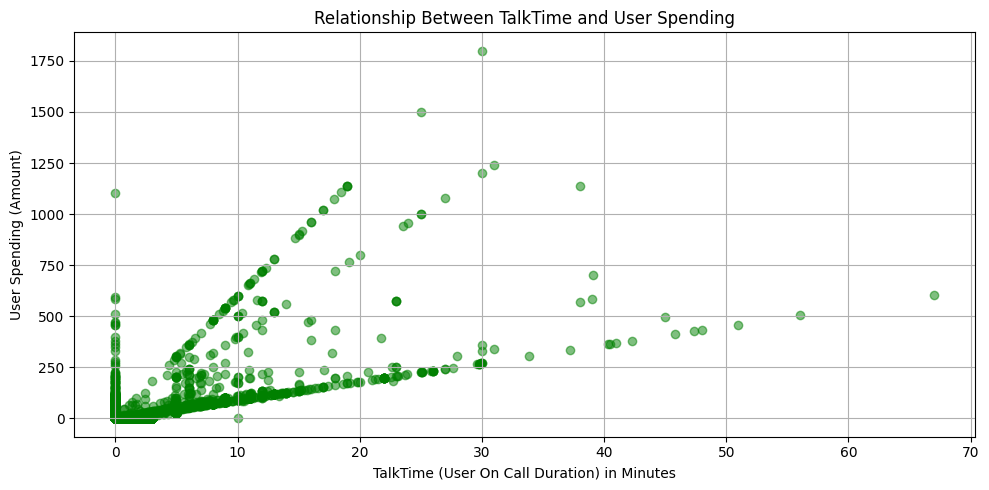

In [54]:
# Convert userOnCallDuration from seconds to minutes
df['userOnCallDuration'] = df['userOnCallDuration'] / 60

# Plot the scatter plot for TalkTime vs. User Spending
plt.figure(figsize=(10, 5))
plt.scatter(df['userOnCallDurationMinutes'], df['amount'], color='g', alpha=0.5)
plt.title('Relationship Between TalkTime and User Spending')
plt.xlabel('TalkTime (User On Call Duration) in Minutes')
plt.ylabel('User Spending (Amount)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 1. Distribution of Call Durations

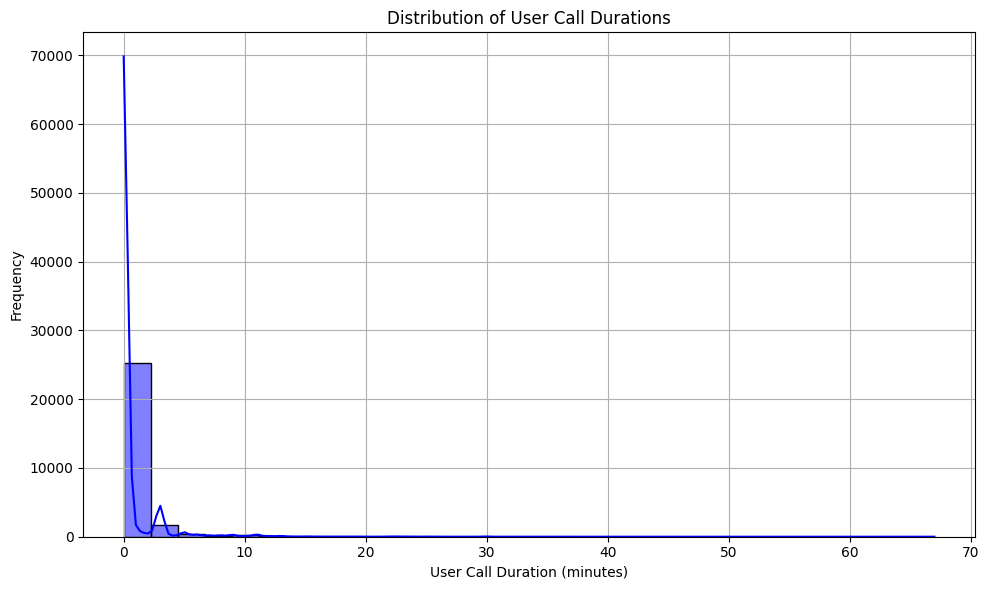

In [56]:


# Plotting the distribution of userOnCallDuration
plt.figure(figsize=(10, 6))
sns.histplot(df['userOnCallDuration'], bins=30, kde=True, color='blue')
plt.title('Distribution of User Call Durations')
plt.xlabel('User Call Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


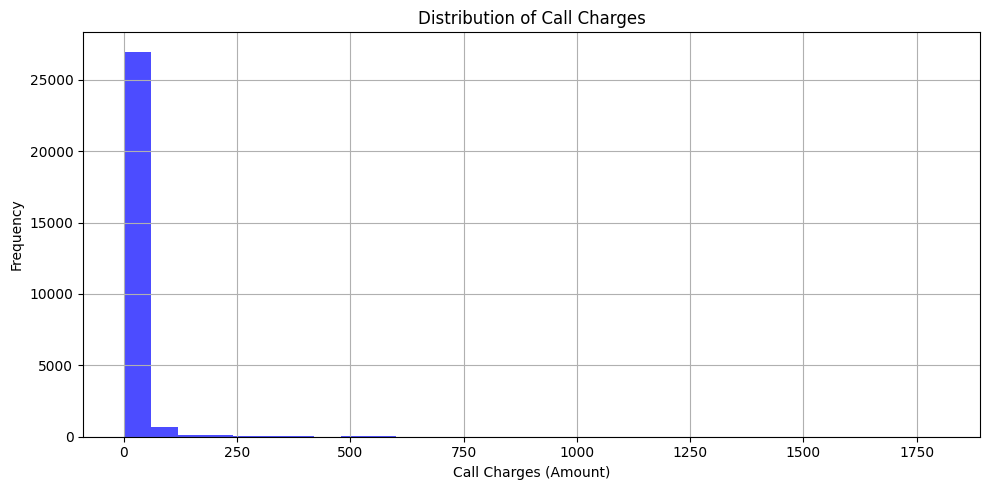

In [57]:
# Ensure amount is numeric and handle non-numeric entries
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Drop rows with NaN values in amount
df_cleaned = df.dropna(subset=['amount'])

# Plot the histogram for call charges (amount)
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['amount'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Call Charges')
plt.xlabel('Call Charges (Amount)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Relationship Between Call Duration and Amount Charged

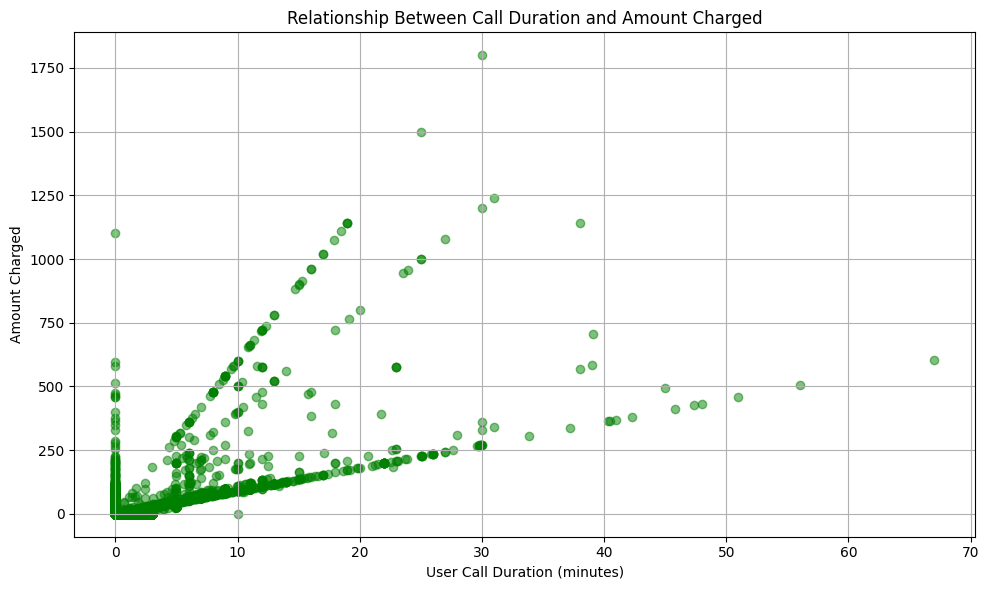

In [55]:
# Plotting the scatter plot for userOnCallDuration vs. amount
plt.figure(figsize=(10, 6))
plt.scatter(df['userOnCallDuration'], df['amount'], color='green', alpha=0.5)
plt.title('Relationship Between Call Duration and Amount Charged')
plt.xlabel('User Call Duration (minutes)')
plt.ylabel('Amount Charged')
plt.grid(True)
plt.tight_layout()
plt.show()


In [173]:
source_counts

source
Production    16256
Test             35
Name: count, dtype: int64

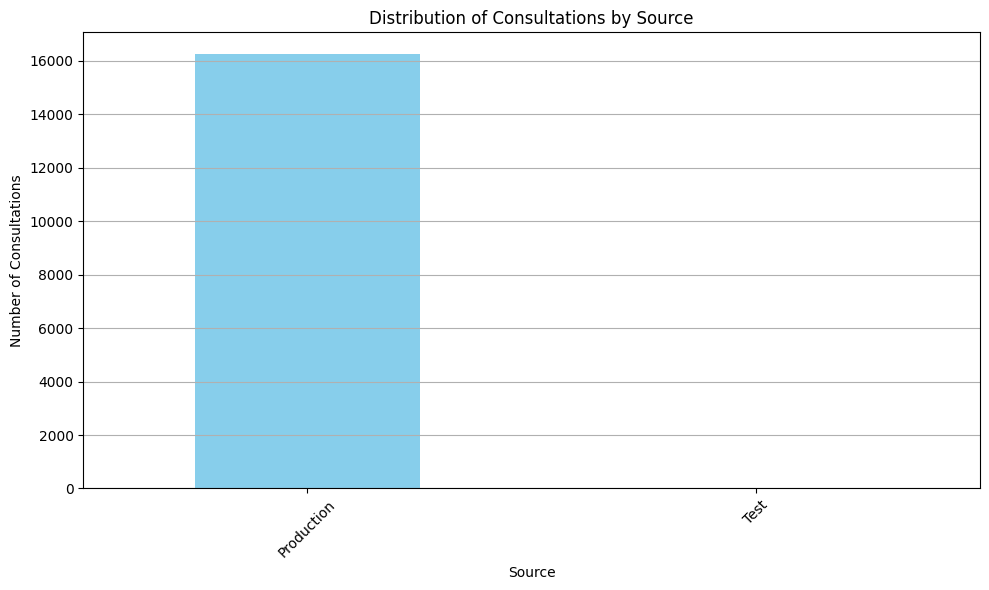

In [172]:


# Example of analysis on 'source' column
source_counts = df[df['source'] != 'N/A']['source'].value_counts()
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Consultations by Source')
plt.xlabel('Source')
plt.ylabel('Number of Consultations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [59]:
source_counts = df[df['source'] != 'N/A']['source'].value_counts()

In [60]:
source_counts 

source
Production    16256
Test             35
Name: count, dtype: int64

In [170]:
# Group by 'guruName' and calculate total earnings
earnings_by_astrologer = df.groupby('guruName')['astrologersEarnings'].sum()

# Find the astrologer with the highest earnings
top_earning_astrologer = earnings_by_astrologer.idxmax()
max_earnings = earnings_by_astrologer.max()

print(f"The astrologer earning the most is '{top_earning_astrologer}' with total earnings of {max_earnings:.2f}")

The astrologer earning the most is ' Dr Balkrisna' with total earnings of 15910.21


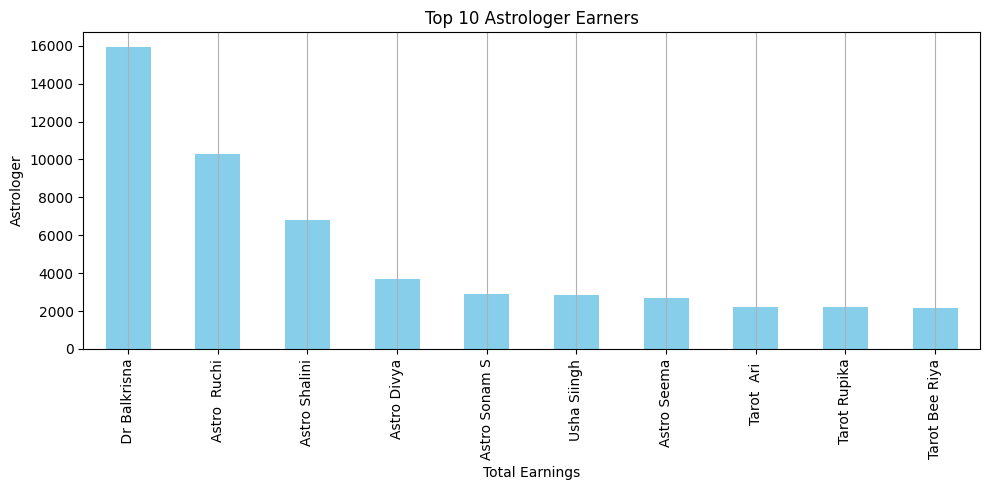

In [60]:
# Group by 'guruName' and calculate total earnings
earnings_by_astrologer = df.groupby('guruName')['astrologersEarnings'].sum()

# Sort the earnings in descending order and select top 10 earners
top_10_earners = earnings_by_astrologer.sort_values(ascending=False).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 5))
top_10_earners.plot(kind='bar', color='skyblue')
plt.title('Top 10 Astrologer Earners')
plt.xlabel('Total Earnings')
plt.ylabel('Astrologer')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [169]:
top_10_spenders

uid
17696    26228.0
33017    18723.0
2044      7486.0
26447     6385.0
2735      5483.0
Name: amount, dtype: float64

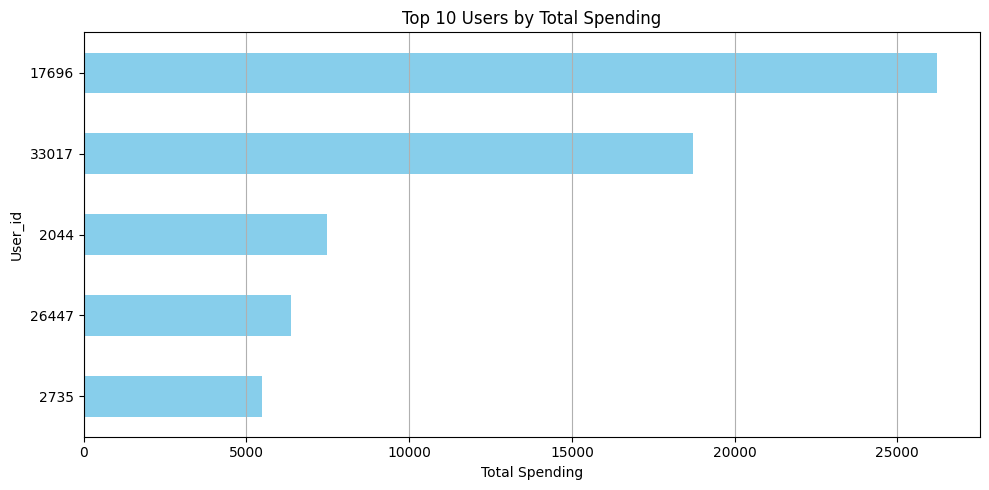

In [61]:

# Group by 'user' and calculate total spending
spending_by_user = df.groupby('uid')['amount'].sum().round(0)

# Sort the spending in descending order and select top 10 spenders
top_10_spenders = spending_by_user.sort_values(ascending=False).head(5)

# Plotting the horizontal bar chart
plt.figure(figsize=(10,5))
top_10_spenders.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Users by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('User_id')
plt.grid(axis='x')


    
plt.tight_layout()
plt.show()

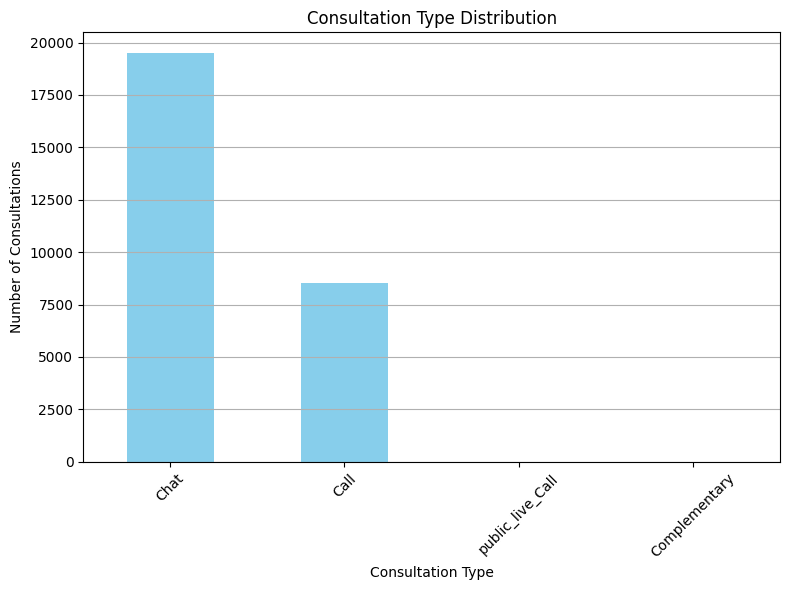

In [74]:
# Count the number of consultations for each consultation type
consultation_counts = df['consultationType'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
consultation_counts.plot(kind='bar', color='skyblue')
plt.title('Consultation Type Distribution')
plt.xlabel('Consultation Type')
plt.ylabel('Number of Consultations')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.tight_layout()
plt.show()

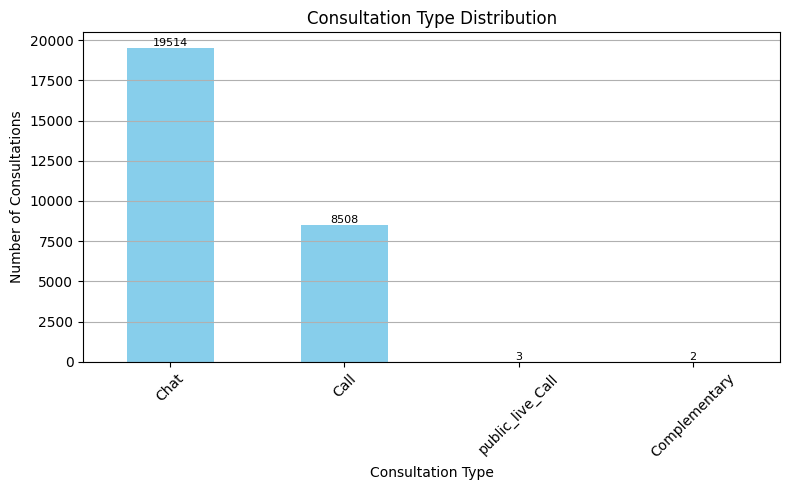

In [63]:
# Count the number of consultations for each consultation type
consultation_counts = df['consultationType'].value_counts()

# Plotting the bar graph with annotations
plt.figure(figsize=(8, 5))
consultation_counts.plot(kind='bar', color='skyblue')
plt.title('Consultation Type Distribution')
plt.xlabel('Consultation Type')
plt.ylabel('Number of Consultations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add numerical values on top of each bar
for index, value in enumerate(consultation_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [166]:
df['website'].value_counts()

website
gurucool     20225
app           7800
dashboard        2
Name: count, dtype: int64

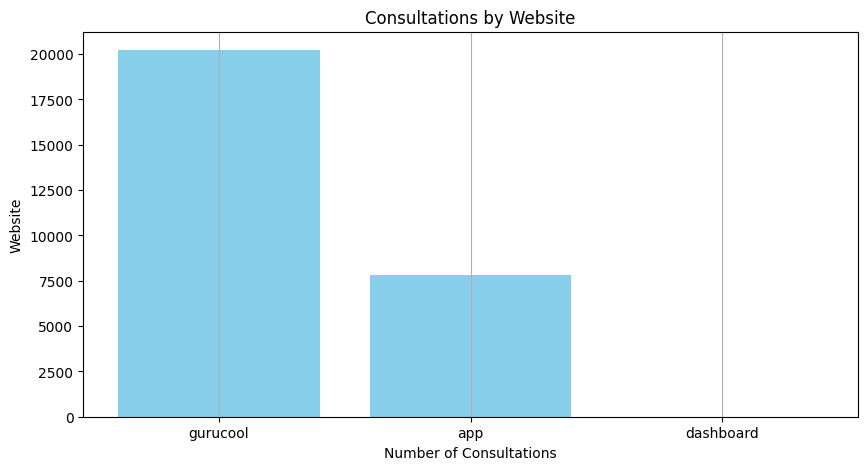

In [64]:
# Count consultations by website
website_counts = df['website'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(website_counts.index, website_counts, color='skyblue')
plt.title('Consultations by Website')
plt.xlabel('Number of Consultations')
plt.ylabel('Website')
plt.grid(axis='x')



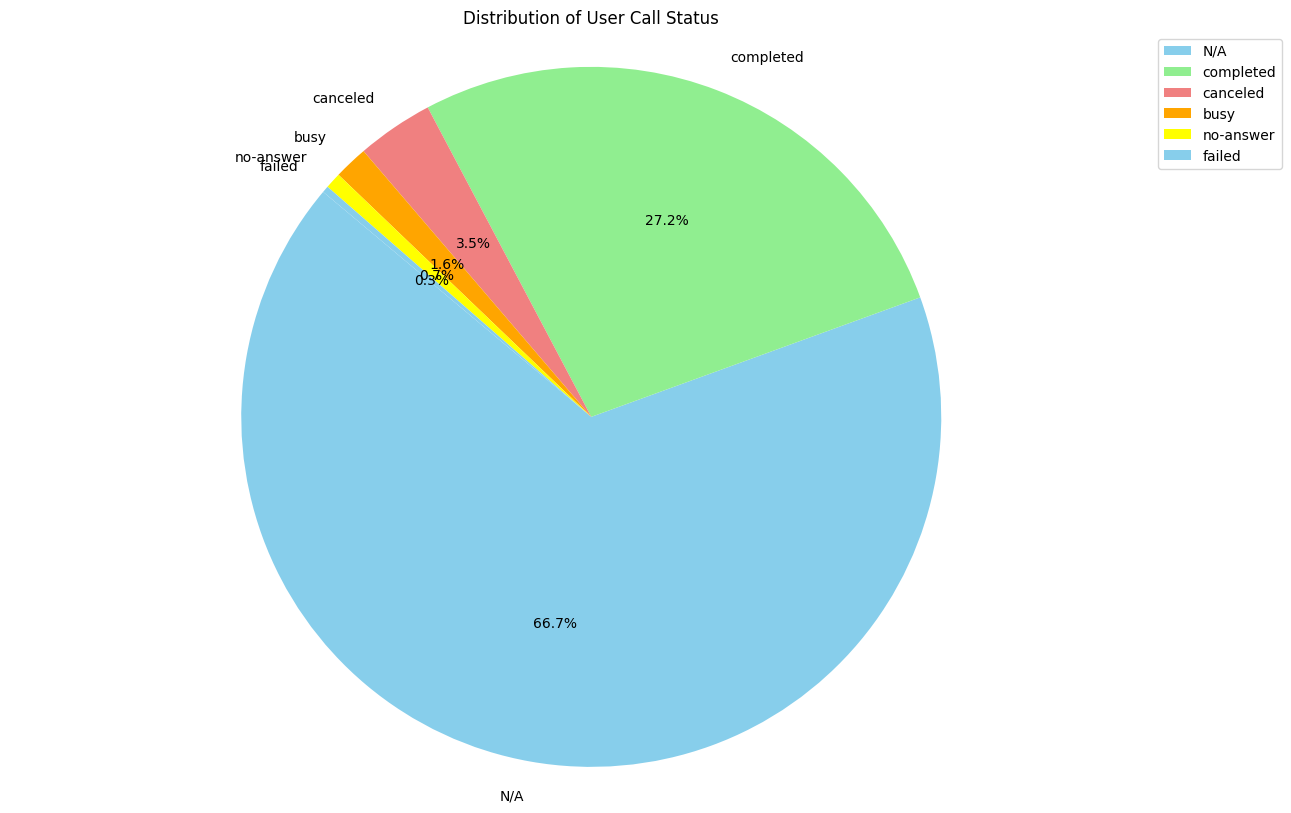

In [113]:


# Count values in 'userCallStatus'
status_counts = df['userCallStatus'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(15, 10))
plt.pie(status_counts,labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'yellow'])
plt.title('Distribution of User Call Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

In [123]:

# Group by 'website' and calculate counts of 'freeCall' and 'freeChat'
grouped_counts = df.groupby('website')[['freeCall', 'freeChat']].sum()



In [124]:
grouped_counts

,freeCall,freeChat
website,,
app,3036,0
dashboard,0,0
gurucool,0,3447


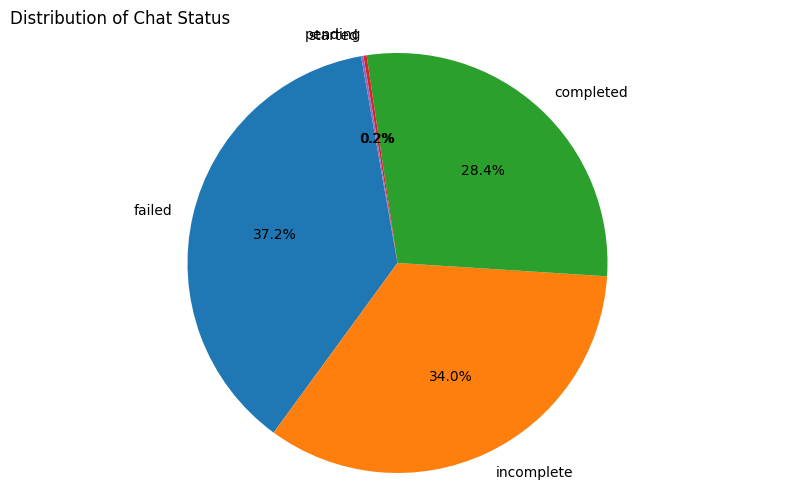

In [13]:
# Exclude 'N/A' values from chatStatus
filtered_data = df[df['chatStatus'] != 'N/A']

# Calculate value counts for each chatStatus
chat_status_counts = filtered_data['chatStatus'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(chat_status_counts, labels=chat_status_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribution of Chat Status', loc='left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

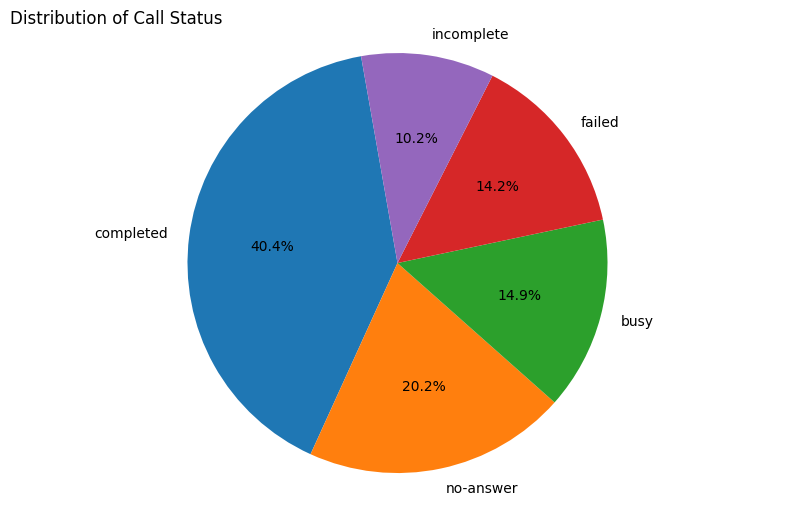

In [165]:
# Exclude 'N/A' values from chatStatus
filtered_data = df[df['callStatus'] != 'N/A']

# Calculate value counts for each chatStatus
chat_status_counts = filtered_data['callStatus'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(chat_status_counts, labels=chat_status_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribution of Call Status', loc='left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
df['isWhiteListUser'].value_counts()

isWhiteListUser
False    28027
Name: count, dtype: int64

In [18]:
df

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,queue,freeCall,...,callChannel,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,source
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580,False,False,...,N/A,N/A,14.55,completed,0,7.275,14.55,completed,0,Test
28023,N/A,Tarot Rupanshi,74,43361,Call,app,no-refund,0,False,False,...,Normal,failed,0.00,failed,0,0.000,0.00,N/A,0,Test
28024,N/A,Astro Sanjeev,95,43361,Call,app,no-refund,0,False,False,...,Normal,failed,0.00,completed,9,0.000,0.00,canceled,0,Test
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,no-answer,0,0.000,0.00,N/A,0,Production


In [33]:
df.nlargest(1,'chatSeconds')[['uid','guruName','amount','chatStatus','freeChat','netAmount','chatSeconds']]

,uid,guruName,amount,chatStatus,freeChat,netAmount,chatSeconds
1577,10251,astro chandan,0.0,failed,False,0.0,7980


In [34]:
# Group by 'guruName' and sum the 'astrologersEarnings'
earnings_by_guru = df.groupby('guruName')['astrologersEarnings'].sum()

# Find the guru with the highest earnings
top_earner = earnings_by_guru.nlargest(1)
print(top_earner)

guruName
Dr Balkrisna    15910.208333
Name: astrologersEarnings, dtype: float64


In [35]:
# Step 1: Identify the top-earning guru
earnings_by_guru = df.groupby('guruName')['astrologersEarnings'].sum()
top_earner = earnings_by_guru.nlargest(1).index[0]

# Step 2: Filter the DataFrame for this guru
top_earner_data = df[df['guruName'] == top_earner]

# Step 3: Count the number of calls and chats
total_calls = top_earner_data[top_earner_data['consultationType'] == 'Call'].shape[0]
total_chats = top_earner_data[top_earner_data['consultationType'] == 'Chat'].shape[0]

print(f"Top Earning Guru: {top_earner}")
print(f"Total Calls: {total_calls}")
print(f"Total Chats: {total_chats}")

Top Earning Guru:  Dr Balkrisna
Total Calls: 309
Total Chats: 378


In [66]:
spending_by_type = df.groupby('consultationType')['amount'].sum()

In [67]:
print("Total Spending on Chats vs Calls:")
print(spending_by_type)


Total Spending on Chats vs Calls:
consultationType
Call                168520.618333
Chat                 45494.683333
Complementary            0.000000
public_live_Call        50.597000
Name: amount, dtype: float64


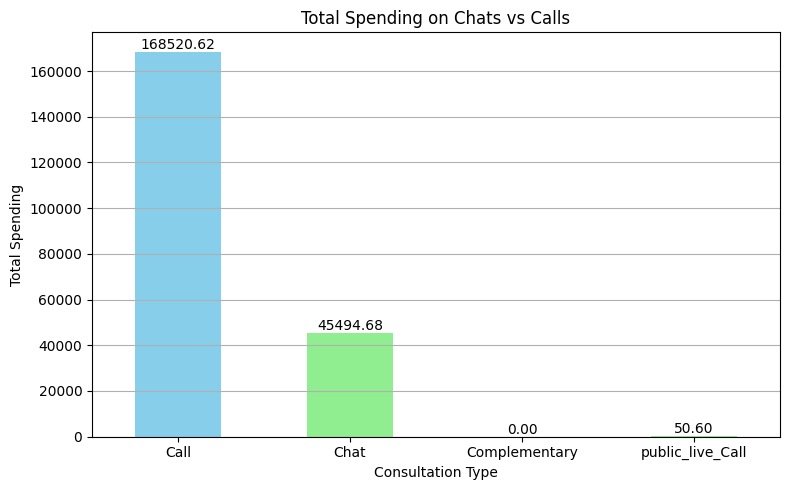

In [68]:


# Plotting the spending on chats vs calls
plt.figure(figsize=(8, 5))
spending_by_type.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Total Spending on Chats vs Calls')
plt.xlabel('Consultation Type')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Add numerical values on top of each bar
for index, value in enumerate(spending_by_type):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [50]:
# Convert durations from seconds to minutes
chat_durations_minutes = chat_durations / 60
call_durations_minutes = call_durations / 60

# Calculate the average durations in minutes
average_chat_duration_minutes = chat_durations_minutes.mean()
average_call_duration_minutes = call_durations_minutes.mean()

# Convert the average durations to minutes and seconds
average_chat_minutes = int(average_chat_duration_minutes)
average_chat_seconds = (average_chat_duration_minutes - average_chat_minutes) * 60

average_call_minutes = int(average_call_duration_minutes)
average_call_seconds = (average_call_duration_minutes - average_call_minutes) * 60



In [49]:
print(f"Average Chat Duration: {average_chat_minutes} minutes and {average_chat_seconds:.0f} seconds")
print(f"Average Call Duration: {average_call_minutes} minutes and {average_call_seconds:.0f} seconds")

Average Chat Duration: 5 minutes and 49 seconds
Average Call Duration: 1 minutes and 57 seconds


In [51]:
df

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,queue,freeCall,...,callChannel,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,source
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580,False,False,...,N/A,N/A,14.55,completed,0,7.275,14.55,completed,0.0,Test
28023,N/A,Tarot Rupanshi,74,43361,Call,app,no-refund,0,False,False,...,Normal,failed,0.00,failed,0,0.000,0.00,N/A,0.0,Test
28024,N/A,Astro Sanjeev,95,43361,Call,app,no-refund,0,False,False,...,Normal,failed,0.00,completed,9,0.000,0.00,canceled,0.0,Test
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300,False,False,...,N/A,N/A,0.00,no-answer,0,0.000,0.00,N/A,0.0,Production


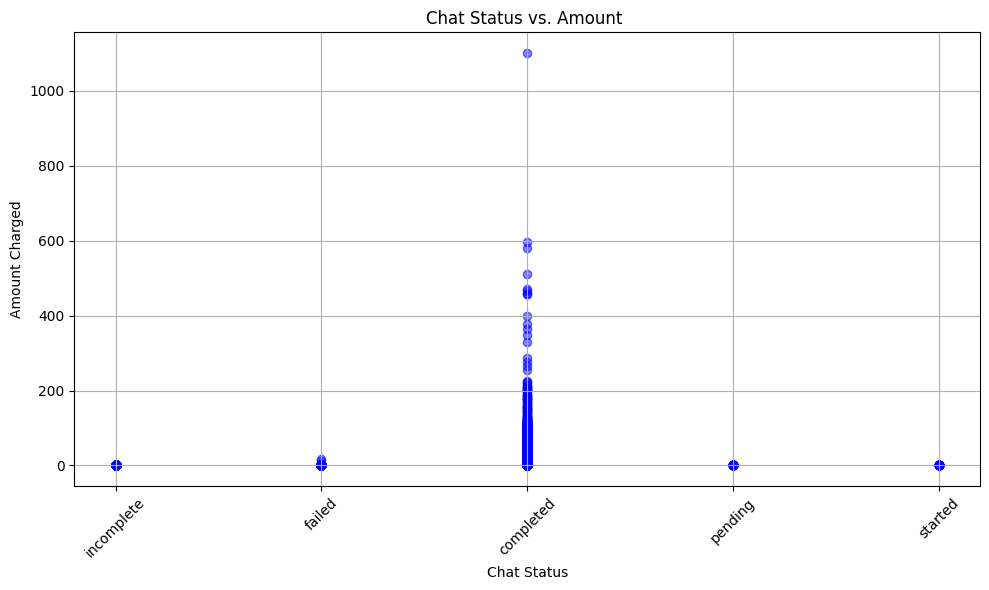

In [55]:
# Exclude 'N/A' values from chatStatus
filtered_df = filtered_df[filtered_df['chatStatus'] != 'N/A']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['chatStatus'], filtered_df['amount'], alpha=0.5, color='blue')

plt.title('Chat Status vs. Amount ')
plt.xlabel('Chat Status')
plt.ylabel('Amount Charged')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [60]:
df.isnull().sum()

chatStatus                  0
guruName                    0
gid                         0
uid                         0
consultationType            0
website                     0
refundStatus                0
chatSeconds                 0
queue                       0
freeCall                    0
freeChat                    0
createdAt                   0
updatedAt                   0
timeDuration                0
callChannel                 0
callStatus                  0
amount                      0
astrologerCallStatus        0
astrologerOnCallDuration    0
astrologersEarnings         0
netAmount                   0
userCallStatus              0
userOnCallDuration          0
source                      0
dtype: int64

In [164]:
df[['guruName', 'totalInteractions']].sort_values(by='totalInteractions', ascending=False).head(10)

,guruName,totalInteractions
1604,astro chandan,2.216667
1577,astro chandan,2.216667
1607,astro chandan,2.216667
1588,astro chandan,2.216667
1585,astro chandan,2.216667
1582,astro chandan,2.216667
1580,astro chandan,2.216667
1599,astro chandan,2.216667
1581,astro chandan,2.216667
1578,astro chandan,2.216667


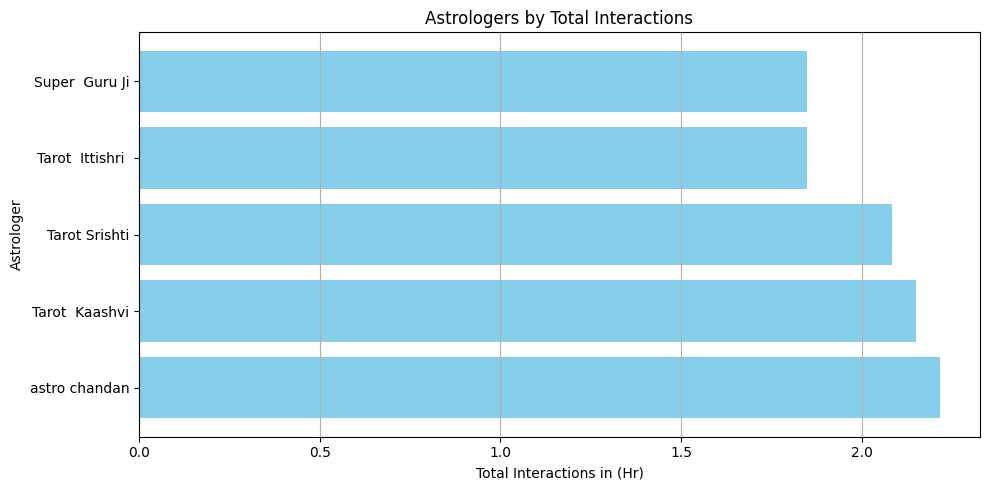

In [163]:
# Calculate total interactions (calls + chats) per astrologer
df['totalInteractions'] = df['userOnCallDuration'] + df['chatSeconds']

# Convert total interactions from seconds to hours
df['totalInteractions'] = df['totalInteractions'] / 3600

# Select relevant columns for plotting
df_plot = df[['guruName', 'totalInteractions']]

# Sort by total interactions descending
df_plot = df_plot.sort_values(by='totalInteractions', ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.barh(df_plot['guruName'], df_plot['totalInteractions'], color='skyblue')

plt.xlabel('Total Interactions in (Hr)')
plt.ylabel('Astrologer')
plt.title('Astrologers by Total Interactions')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

In [109]:
df

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,source,totalInteractions
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,True,...,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A,300.0
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,True,...,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A,300.0
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300,False,True,...,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A,300.0
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300,False,True,...,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A,300.0
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300,False,False,...,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580,False,False,...,N/A,14.55,completed,0,7.275,14.55,completed,0.0,Test,2580.0
28023,N/A,Tarot Rupanshi,74,43361,Call,app,no-refund,0,False,False,...,failed,0.00,failed,0,0.000,0.00,N/A,0.0,Test,0.0
28024,N/A,Astro Sanjeev,95,43361,Call,app,no-refund,0,False,False,...,failed,0.00,completed,9,0.000,0.00,canceled,0.0,Test,0.0
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300,False,False,...,N/A,0.00,no-answer,0,0.000,0.00,N/A,0.0,Production,300.0


In [110]:
# Count occurrences of 'incomplete' and 'failed' in chatStatus
chat_incomplete_count = df[df['chatStatus'] == 'incomplete'].shape[0]
chat_failed_count = df[df['chatStatus'] == 'failed'].shape[0]

# Calculate percentages if needed
total_chats = df.shape[0]
chat_incomplete_percent = (chat_incomplete_count / total_chats) * 100
chat_failed_percent = (chat_failed_count / total_chats) * 100

# Display results
print(f"Chat Status - Incomplete: {chat_incomplete_count} ({chat_incomplete_percent:.2f}%)")
print(f"Chat Status - Failed: {chat_failed_count} ({chat_failed_percent:.2f}%)")


Chat Status - Incomplete: 6641 (23.70%)
Chat Status - Failed: 7256 (25.89%)


In [120]:
# Filter rows with 'incomplete' or 'failed' statuses in chatStatus or callStatus
bad_statuses = df[(df['chatStatus'].isin(['incomplete', 'failed','canceled'])) | (df['callStatus'].isin(['incomplete', 'failed','no-answer']))]

# Count occurrences for each guruName
bad_status_counts = bad_statuses.groupby('guruName').size().reset_index(name='bad_status_count')

# Sort by bad_status_count descending and select top 5
top_5_bad_astrologers = bad_status_counts.sort_values(by='bad_status_count', ascending=False).head(5)

# Display the top 5 astrologers
print("Top 5 Astrologers with the Most 'Incomplete' or 'Failed' or 'canceled' or 'no-answer'  Statuses:")
print(top_5_bad_astrologers[['guruName', 'bad_status_count']])




Top 5 Astrologers with the Most 'Incomplete' or 'Failed' or 'canceled' or 'no-answer'  Statuses:
            guruName  bad_status_count
29     Astro  Sakthi              1148
54     Astro Krishaa              1013
16    Astro  Brejesh               798
39   Astro  Yogendra               680
117   Tarot Bee Riya               623


In [122]:
df.columns

Index(['chatStatus', 'guruName', 'gid', 'uid', 'consultationType', 'website',
       'refundStatus', 'chatSeconds', 'freeCall', 'freeChat', 'createdAt',
       'updatedAt', 'timeDuration', 'callChannel', 'callStatus', 'amount',
       'astrologerCallStatus', 'astrologerOnCallDuration',
       'astrologersEarnings', 'netAmount', 'userCallStatus',
       'userOnCallDuration', 'source', 'totalInteractions'],
      dtype='object')

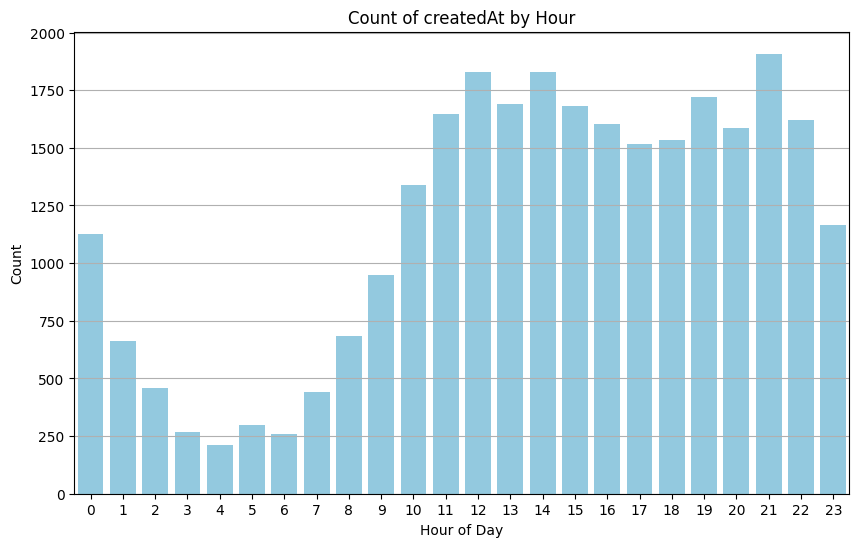

In [132]:
# Convert 'createdAt' to datetime format
df['createdAt'] = pd.to_datetime(df['createdAt'], format='%d-%m-%Y %H:%M')

# Extract hour from 'createdAt'
df['hour'] = df['createdAt'].dt.hour

# Group by hour and count occurrences
hour_count = df['hour'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_count.index, y=hour_count.values, color='skyblue')
plt.title('Count of createdAt by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [145]:
df.drop(['totalInteractions','hour'],axis=1,inplace=True)

In [146]:
df

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,timeDuration,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,source
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,True,...,0.0088,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300,False,True,...,0.0041,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300,False,True,...,0.0042,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300,False,True,...,0.0067,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300,False,False,...,0.0000,N/A,0.00,N/A,0,0.000,0.00,N/A,0.0,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580,False,False,...,1.6167,N/A,14.55,completed,0,7.275,14.55,completed,0.0,Test
28023,N/A,Tarot Rupanshi,74,43361,Call,app,no-refund,0,False,False,...,0.0000,failed,0.00,failed,0,0.000,0.00,N/A,0.0,Test
28024,N/A,Astro Sanjeev,95,43361,Call,app,no-refund,0,False,False,...,0.0000,failed,0.00,completed,9,0.000,0.00,canceled,0.0,Test
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300,False,False,...,0.0000,N/A,0.00,no-answer,0,0.000,0.00,N/A,0.0,Production


In [3]:
q1=df.amount.quantile(0.25)

In [4]:
q3=df.amount.quantile(0.75)

In [7]:
print(q1)
print(q3)

0.0
0.0


In [8]:
df['amount'].max()

1800.0

In [9]:
df['amount'].describe()

count    28027.000000
mean         7.637846
std         50.648404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1800.000000
Name: amount, dtype: float64

In [10]:
IQR=q3-q1

In [11]:
lower_limit= q1 - 1.5*IQR

In [12]:
Upper_limit= q3 + 1.5*IQR

In [13]:
df_no_outlier=df[(df.amount>lower_limit) & (df.amount<Upper_limit)]

In [19]:
lower_limit

0.0

In [20]:
Upper_limit

0.0

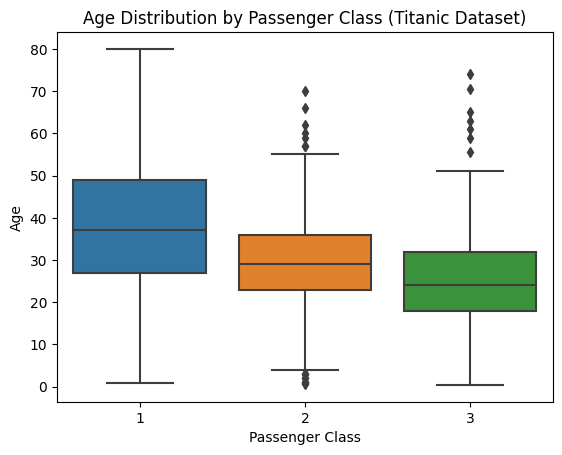

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Creating a box plot with embedded outliers using Seaborn
sns.boxplot(x='pclass', y='age', data=titanic, showfliers=True)
plt.title('Age Distribution by Passenger Class (Titanic Dataset)')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


In [24]:
titanic['pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

In [25]:
titanic['pclass'].nunique()

3